In [1]:
import sys, os
sys.path.insert(0, os.path.abspath('../'))
#from coreli import *
import coreli
import itertools 
from functools import reduce
import matplotlib.pyplot as plt
import numpy as np
import random
import math

In [4]:
import sympy

In [2]:
pv = coreli.ParityVector([1,1,0,0,0])
pv.cyclic_rational()

5/23

In [7]:
Z2 = coreli.Padic(2)
Z2.from_rational(sympy.Rational(5,23)).rational_periodic_representation()

'(01100100001)* 1'

In [20]:
def expected_waiting_time(n):
    total = 0
    prob_no_repeat = 1.0
    for k in range(n):
        total += prob_no_repeat
        prob_no_repeat *= (n - k - 1) / n
    return total

def expected_waiting_time_approx(n):
    return math.sqrt(math.pi * n / 2)

def expected_waiting_time_empirical(n, repeat=1000):
    waiting_times = []
    for _ in range(repeat):
        draws = set({})
        x = random.randint(1,n)
        waiting_time = 0
        while x not in draws:
            draws.add(x)
            x = random.randint(1,n)
            waiting_time += 1
        waiting_times.append(waiting_time)
    return float(np.mean(waiting_times))


In [21]:
expected_waiting_time(400)

24.73809804173022

In [22]:
expected_waiting_time_approx(400)

25.066282746310005

In [23]:
expected_waiting_time_empirical(400)

24.449

In [33]:
Z2 = Padic(2)
Z3 = Padic(3)
Z6 = Padic(6)

In [ ]:
def metric(pv):
    # e.g. [1,0,0,0,1] -> 19/23
    cyclic_rational = ParityVector(pv).cyclic_rational()
    Z6 = Padic(6)
    # e.g. [1,0,0,0,1] -> 19/23 -> (41013220304)* 5
    six_adic_expansion = Z6.from_rational(cyclic_rational).rational_periodic_representation()

    # |period| + |preperiod|
    expansion_len = len(six_adic_expansion)-4

    # all the 1s of the pv correspond to 4 possible tile north-west angle and the 0s to 2 possible horizontal 0/1
    max_len = reduce(lambda x, y: x * y, [4 if i == 1 else 2 for i in pv])

    return expansion_len/max_len
    


In [48]:
def reality_vs_random(pv):
    # e.g. [1,0,0,0,1] -> 19/23
    cyclic_rational = ParityVector(pv).cyclic_rational()
    Z6 = Padic(6)
    # e.g. [1,0,0,0,1] -> 19/23 -> (41013220304)* 5
    six_adic_expansion = Z6.from_rational(cyclic_rational).rational_periodic_representation()

    # |period| + |preperiod|
    expansion_len = len(six_adic_expansion)-4

    # all the 1s of the pv correspond to 4 possible tile north-west angle and the 0s to 2 possible horizontal 0/1
    space_size = reduce(lambda x, y: x * y, [4 if i == 1 else 2 for i in pv])

    # For n big, the expected number of draws of n distrinct objects with replacement
    # until you get the same twice is ~ sqrt(n * pi/2)
    expected_random_len = expected_waiting_time_approx(space_size)

    # print("".join(map(str,pv)), expansion_len, expected_random_len)
    return expansion_len/expected_random_len
    


In [54]:
metrics_random = []
for pv in itertools.product([0,1],repeat=14):
    if pv.count(1) >= pv.count(0) and 2**len(pv) > 3**pv.count(1):
        metrics_random.append(reality_vs_random(pv))

In [55]:
np.mean(metrics_random)

np.float64(1.71635144768275)

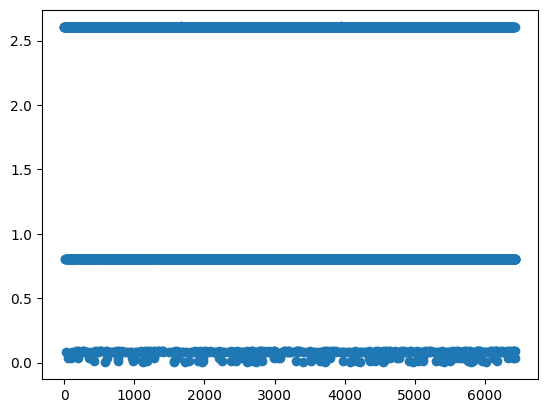

In [56]:
plt.plot(metrics_random, 'o')